In [1]:
%matplotlib inline
import os
import sys
sys.path.append('..')

import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from config.config import MODEL_PATH

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", rc={
        "font.size":12,
        "font.family":'serif',
        "font.serif":'Times',
        "text.usetex":True,
        "axes.labelsize":16,
        "xtick.labelsize":12,
        "ytick.labelsize":12,
        "legend.fontsize": 15,
        "title.fontsize": 16,
        "savefig.dpi": 400,})

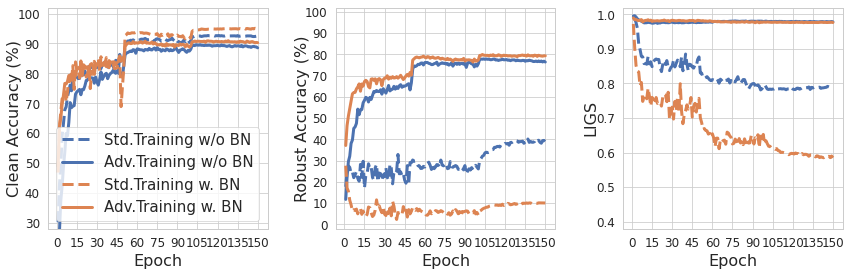

In [3]:
standard_id = os.path.join(MODEL_PATH, "bn/20211028_144301_642_cifar10_resnet18_id_cifar_1337")
robust_id = os.path.join(MODEL_PATH, "bn/20211028_144305_600_cifar10_resnet18_id_cifar_1337_adv_train")

standard_bn = os.path.join(MODEL_PATH, "bn/20211028_144259_060_cifar10_resnet18_bn_cifar_1337")
robust_bn = os.path.join(MODEL_PATH, "bn/20211028_144303_605_cifar10_resnet18_bn_cifar_1337_adv_train")

models = [standard_id, robust_id, standard_bn, robust_bn]
labels = ["Std.Training w/o BN", "Adv.Training w/o BN", "Std.Training w. BN", "Adv.Training w. BN"]
linesty = ["--", "-", "--", "-"]
colors = [sns.color_palette()[0], sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[1]]

fig = plt.figure(figsize=(12,4))
# Plot the accuracy
ax1 = plt.subplot(131)
for idx, model in enumerate(models):
    stats_path = os.path.join(model, "stats.csv")
    stats = pd.read_csv(stats_path, skiprows=1, names=["epoch", "train_acc1", "train_acc5", "train_loss", "val_acc1", "val_acc5", "val_loss"])
    
    sns.lineplot(x="epoch", y="val_acc1", data=stats, linewidth=3.0, 
                 color=colors[idx], label=labels[idx])
    ax1.lines[idx].set_linestyle(linesty[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel("Clean Accuracy (%)")
    ax1.yaxis.labelpad = -5
    plt.xticks(np.arange(0, 165, step=15))
    plt.ylim(28, 102)

# Plot the robust accuracy
ax1 = plt.subplot(132)
for idx, model in enumerate(models):
    l2_path = os.path.join(model, "pgd_l2.csv")
    l2_standard = pd.read_csv (l2_path, names=["acc1", "acc5", "loss"])
    sns.lineplot(x=np.arange(1, len(l2_standard)+1), y="acc1", data=l2_standard, linewidth=3.0, 
                 color=colors[idx])
    ax1.lines[idx].set_linestyle(linesty[idx])

    plt.xlabel("Epoch")
    plt.ylabel("Robust Accuracy (%)")
    ax1.yaxis.labelpad = -5
    plt.xticks(np.arange(0, 165, step=15))
    plt.ylim(-2, 102)
    plt.yticks(np.arange(0, 110, step=10))


# Plot the local linearity 
ax1 = plt.subplot(133)
for idx, model in enumerate(models):
    lls_path = os.path.join(model, "ligs.csv")
    lls_standard = pd.read_csv (lls_path, names=["sim_logit", "sim_grad"])
    sns.lineplot(x=np.arange(1,len(lls_standard)+1), y="sim_grad", data=lls_standard, linewidth=3.0, 
                 color=colors[idx])
    ax1.lines[idx].set_linestyle(linesty[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel("LIGS")
    ax1.yaxis.labelpad = -2
    plt.xticks(np.arange(0, 165, step=15))
    plt.ylim(0.38, 1.02)
    plt.yticks(np.arange(0.4, 1.02, step=0.1))
    
plt.tight_layout()
plt.savefig("./figures/resnet18_bn_clean_robust_ligs.png")

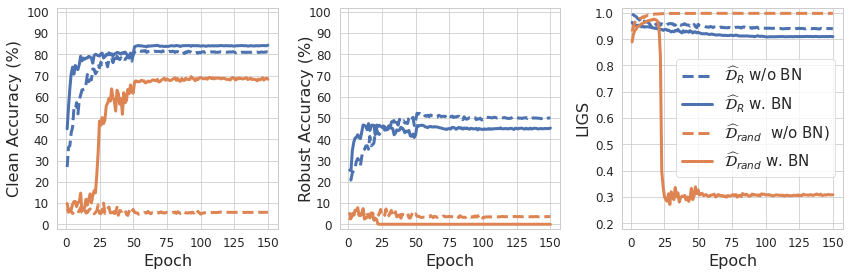

In [4]:
model_d_robust_id = os.path.join(MODEL_PATH, "bn/20211029_061508_556_d_robust_cifar_resnet18_id_cifar_1337")
model_d_robust_bn = os.path.join(MODEL_PATH, "bn/20211029_061444_681_d_robust_cifar_resnet18_bn_cifar_1337")

model_d_rand_id = os.path.join(MODEL_PATH, "bn/20211029_061618_810_drand_cifar_resnet18_id_cifar_1337")
model_d_rand_bn = os.path.join(MODEL_PATH, "bn/20211029_061545_530_drand_cifar_resnet18_bn_cifar_1337")

models = [model_d_robust_id, model_d_robust_bn, model_d_rand_id, model_d_rand_bn]

linestyle = ["--", "-", "--", "-", "--", "-"]
labels = [r"$\widehat{\mathcal{D}}_{R}$ w/o BN", r"$\widehat{\mathcal{D}}_{R}$ w. BN",
          r"$\widehat{\mathcal{D}}_{rand}$  w/o BN)", r"$\widehat{\mathcal{D}}_{rand}$ w. BN", "id", "bn"]
colors = [sns.color_palette()[0], sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[2]]

fig = plt.figure(figsize=(12,4))
# Plot the accuracy
ax1 = plt.subplot(131)
for idx, model in enumerate(models):
    stats_path = os.path.join(model, "stats.csv")
    stats = pd.read_csv(stats_path, skiprows=1, names=["epoch", "train_acc1", "train_acc5", "train_loss", "val_acc1", "val_acc5", "val_loss"])
    
    sns.lineplot(x="epoch", y="val_acc1", data=stats, linewidth=3.0, color=colors[idx])
    ax1.lines[idx].set_linestyle(linestyle[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel("Clean Accuracy (%)")
    plt.xticks(np.arange(0, 165, step=25))
    plt.ylim(-2, 102)
    plt.yticks(np.arange(0, 110, step=10))
    
# Plot the robust accuracy
ax1 = plt.subplot(132)
for idx, model in enumerate(models):
    l2_path = os.path.join(model, "pgd_l2.csv")
    l2_standard = pd.read_csv (l2_path, names=["acc1", "acc5", "loss"])
    sns.lineplot(x=np.arange(1, len(l2_standard)+1), y="acc1", data=l2_standard, linewidth=3.0, color=colors[idx])
    ax1.lines[idx].set_linestyle(linestyle[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel("Robust Accuracy (%)")
    ax1.yaxis.labelpad = -5
    plt.xticks(np.arange(0, 165, step=25))
    plt.ylim(-2, 102)
    plt.yticks(np.arange(0, 110, step=10))
    
# Plot the local linearity 
ax1 = plt.subplot(133)
for idx, model in enumerate(models):
    lls_path = os.path.join(model, "ligs.csv")
    lls = pd.read_csv (lls_path, names=["sim_logit", "sim_grad"])
    
    sns.lineplot(x=np.arange(1,len(lls)+1), y="sim_grad", data=lls, linewidth=3.0, color=colors[idx], label=labels[idx])
    ax1.lines[idx].set_linestyle(linestyle[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel("LIGS")
    plt.xticks(np.arange(0, 165, step=25))
    plt.ylim(0.18, 1.02)
    plt.yticks(np.arange(0.2, 1.1, step=0.1))

plt.tight_layout()
plt.savefig("./figures/resnet18_drobust_drand.png")

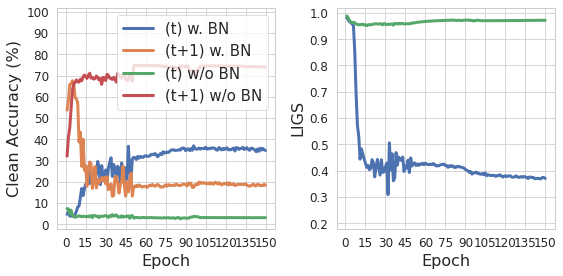

In [5]:
# Confliciting feature dataset w. BN
conflicting_features_bn = os.path.join(MODEL_PATH, "bn/20211030_051601_059_grad_imgs_cifar10_resnet18_bn_cifar_1337_conflicting_features")
# Confliciting feature dataset w/o BN
conflicting_features_id = os.path.join(MODEL_PATH, "bn/20211030_051700_188_grad_imgs_cifar10_resnet18_id_cifar_1337_conflicting_features")

linestyle = ["-", "-", "--", "-", "--", "-"]
models = [conflicting_features_bn, conflicting_features_id]
labels = ["(t) w. BN", "(t+1) w. BN",
          "(t) w/o BN", "(t+1) w/o BN"]

fig = plt.figure(figsize=(8,4))
# Plot the accuracy
ax1 = plt.subplot(121)
for idx, model in enumerate(models): 
    stats_path = os.path.join(model, "stats.csv")
    stats = pd.read_csv(stats_path, skiprows=1, names=["epoch", "train_acc1", "train_acc5", "train_loss", "val_acc1", "val_acc5", "val_loss"])
    
    sns.lineplot(x="epoch", y="val_acc1", data=stats, linewidth=3.0, label=labels[idx*2])
    ax1.lines[idx].set_linestyle(linestyle[idx])
    
    # Load the shifted result
    ddet_path = os.path.join(model, "shifted_label.csv")
    ddet_data = pd.read_csv(ddet_path, names=["acc1", "acc5", "loss"])
    sns.lineplot(x=np.arange(1, len(ddet_data)+1), y="acc1", data=ddet_data, linewidth=3.0, label=labels[idx*2+1])
    ax1.lines[idx].set_linestyle(linestyle[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel("Clean Accuracy (%)")
    plt.xticks(np.arange(0, 165, step=15))
    plt.ylim(-2, 102)
    plt.yticks(np.arange(0, 110, step=10))
    
# Plot the local linearity 
colors = [sns.color_palette()[0], sns.color_palette()[2]]
ax1 = plt.subplot(122)
for idx, model in enumerate(models):
    # Load the local_linearity_stats.csv
    lls_path = os.path.join(model, "ligs.csv")
    lls = pd.read_csv (lls_path, names=["sim_logit", "sim_grad"])
    
    sns.lineplot(x=np.arange(1,len(lls)+1), y="sim_grad", data=lls, linewidth=3.0, color=colors[idx])
    ax1.lines[idx].set_linestyle(linestyle[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel("LIGS")
    plt.xticks(np.arange(0, 165, step=15))
    plt.ylim(0.18, 1.02)
    plt.yticks(np.arange(0.2, 1.1, step=0.1))

plt.tight_layout()
plt.savefig("./figures/resnet18_conflicting_features.png")